In [1]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image, make_image_grid
import numpy as np
import torch
from PIL import Image
import cv2

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", controlnet=controlnet, use_safetensors=True).to("cuda")
pipe.enable_model_cpu_offload()

/home/rmuproject/rmuproject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 14.03it/s]


In [3]:
image1 = Image.open("/home/rmuproject/rmuproject/users/sandesh/scripts/Hareque.png").convert("RGB")
np_image = np.array(image1)

# get canny image
np_image = cv2.Canny(np_image, 100, 200)
np_image = np_image[:, :, None]
np_image = np.concatenate([np_image, np_image, np_image], axis=2)
canny_image = Image.fromarray(np_image)
# generate image
generator = torch.manual_seed(42)
image = pipe(
    "",
    guess_mode=True,
    generator=generator,
    image=canny_image,
    guidance_scale=3.0,
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [01:31<00:00,  1.83s/it]


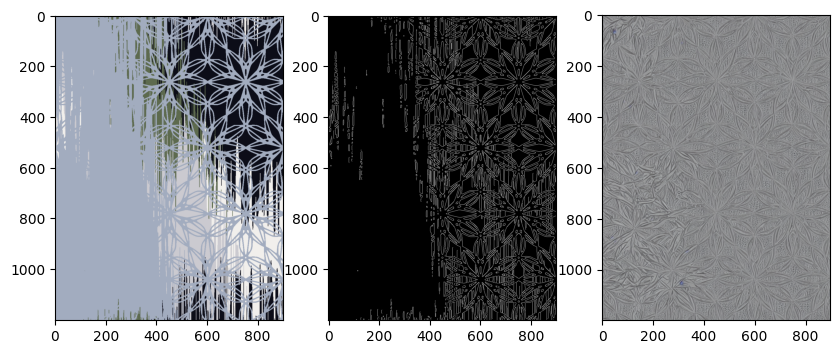

In [4]:
make_image_grid([image1, canny_image, image], rows=1, cols=3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(np.array(image1))
ax[2].imshow(np.array(image))
ax[1].imshow(np.array(canny_image))
plt.show()


In [5]:
from diffusers import StableDiffusionImageVariationPipeline
model_id = "/home/rmuproject/rmuproject/users/sandesh/models/80_epochs"
pipeline = StableDiffusionImageVariationPipeline.from_pretrained(model_id)
device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline.to(device)
pipeline.enable_model_cpu_offload()
width, height = image.size
seed = 42
num_variations = 5
generator = torch.Generator(device="cuda").manual_seed(seed)
alphabets = ['a', 'b', 'c', 'd', 'e']
generated_images = []
for _ in range(num_variations):
    images = pipeline(
        image=image,
        num_inference_steps=50,  # Number of diffusion steps
        guidance_scale=2.5,  # Scale for conditional guidance
        generator=generator
    ).images
    generated_images.append(images[0])

for j, img in enumerate(generated_images):
        # Resize the generated images to the output dimension
        resized_image = img.resize((width, height))
        resized_image.save(f"/home/rmuproject/rmuproject/users/sandesh/output{alphabets[j]}.png")
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 3, figsize=(10, 5))
# ax[0].imshow(np.array(image1))
# ax[2].imshow(np.array(image.resize((900, 1080))))
# ax[1].imshow(np.array(canny_image))

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 15.08it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_image_variation.StableDiffusionImageVariationPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|██████████| 50/50 [00:12<00:00,  4.09it/s]


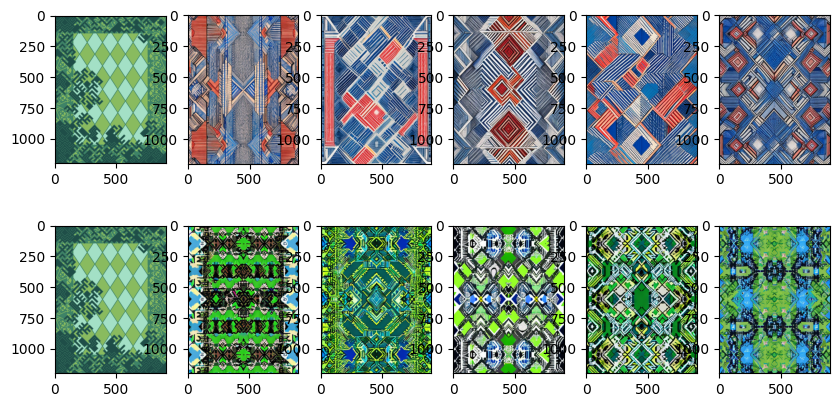

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 6, figsize=(10, 5))
ax[0, 0].imshow(np.array(image1))
ax[0, 1].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outputa.png")))
ax[0, 2].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outputb.png")))
ax[0, 3].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outputc.png")))
ax[0, 4].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outputd.png")))
ax[0, 5].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/outpute.png")))
# ax[0].title('2 pipeline infer')
ax[1, 0].imshow(np.array(image1))
ax[1, 1].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50a.png")))
ax[1, 2].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50b.png")))
ax[1, 3].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50c.png")))
ax[1, 4].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50d.png")))
ax[1, 5].imshow(np.array(Image.open("/home/rmuproject/rmuproject/users/sandesh/renders/Output/output_50e.png")))
# ax[1].title('1 pipeline infer')
plt.show()